In [1]:
import warnings
warnings.filterwarnings("ignore", message=".use_inf_as_na option is deprecated.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1)
data = pd.DataFrame(X, columns=['size', 'bedrooms', 'bathrooms', 'floors', 'age'])
data['price'] = y

print(data.head())


       size  bedrooms  bathrooms    floors       age       price
0  1.030151  0.425003  -0.345781  1.376945  1.079701  202.419739
1 -1.768746 -0.361960  -1.105595 -0.446693 -0.703801 -231.174468
2 -1.311411  0.425955   0.924211 -0.569727  0.307185 -120.359101
3  0.756845  1.047269   0.366208 -1.861654  0.746776   81.268969
4  0.428598 -0.601440  -1.342269 -0.658654  0.151800   13.858133


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   size       1000 non-null   float64
 1   bedrooms   1000 non-null   float64
 2   bathrooms  1000 non-null   float64
 3   floors     1000 non-null   float64
 4   age        1000 non-null   float64
 5   price      1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB
None
              size     bedrooms    bathrooms       floors          age  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.008341     0.012318    -0.047768     0.000423     0.032175   
std       1.023155     0.974367     0.969047     0.973520     0.998719   
min      -3.657266    -3.123286    -3.850531    -2.983420    -3.352082   
25%      -0.671137    -0.687724    -0.702071    -0.637126    -0.666138   
50%       0.022512     0.031105    -0.071822     0.014563     0.022272   
75%       0

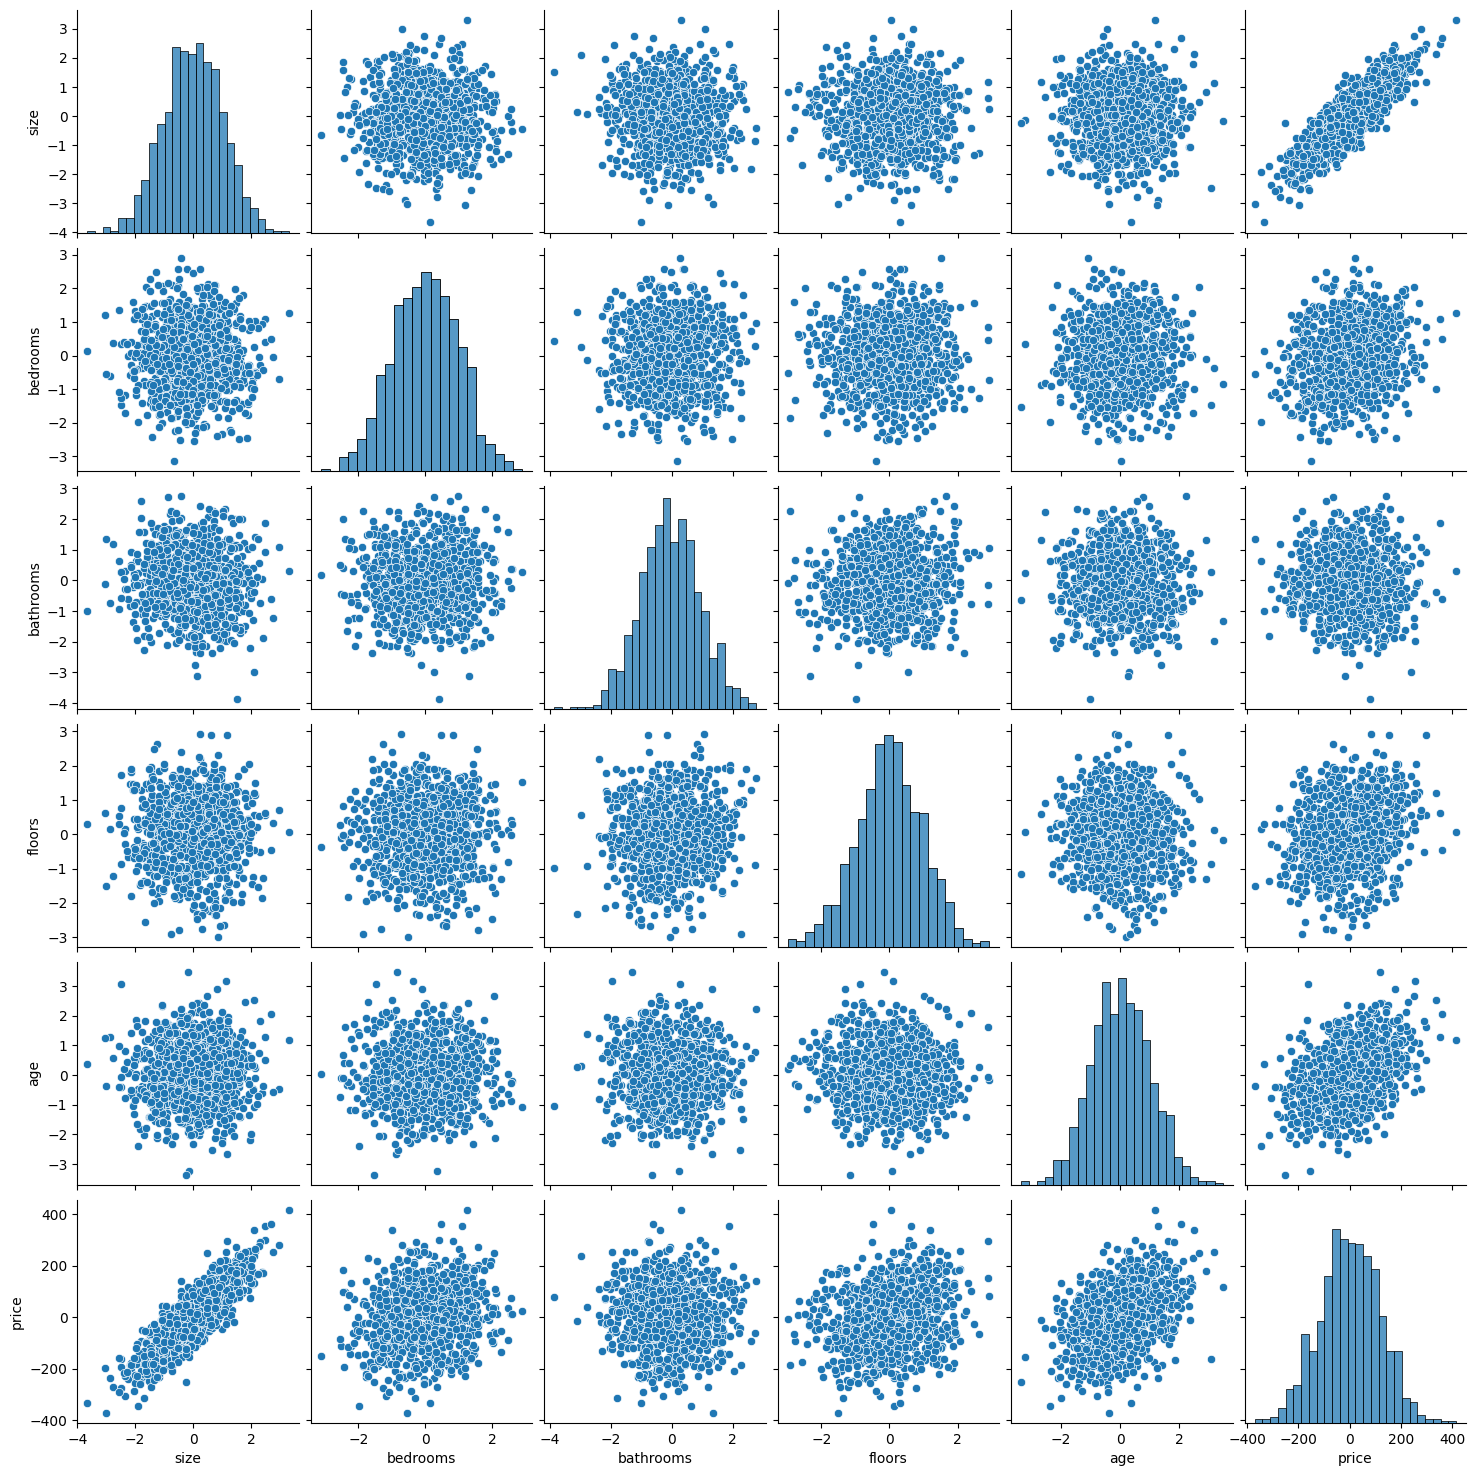

In [3]:
# Explore data
print(data.info())
print(data.describe())
sns.pairplot(data)
plt.show()

In [4]:
# Preprocess data
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.009071292201128145
Root Mean Squared Error: 0.09524333153102187
R-squared: 0.9999993182026015


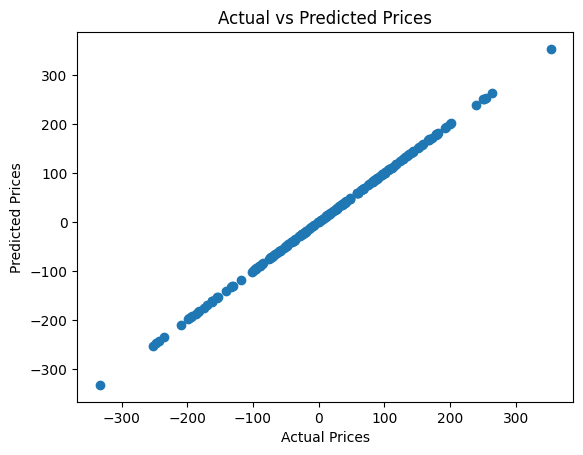

In [7]:
# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()